In [1]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.3646 - val_loss: 0.2713
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2648 - val_loss: 0.2545
Epoch 3/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.2439 - val_loss: 0.2308
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.2228 - val_loss: 0.2122
Epoch 5/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.2073 - val_loss: 0.1995
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1964 - val_loss: 0.1904
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1882 - val_loss: 0.1832
Epoch 8/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1813 - val_loss: 0.1766
Epoch 9/50
60000/60000 [==============================] - 3s 4

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

In [10]:
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

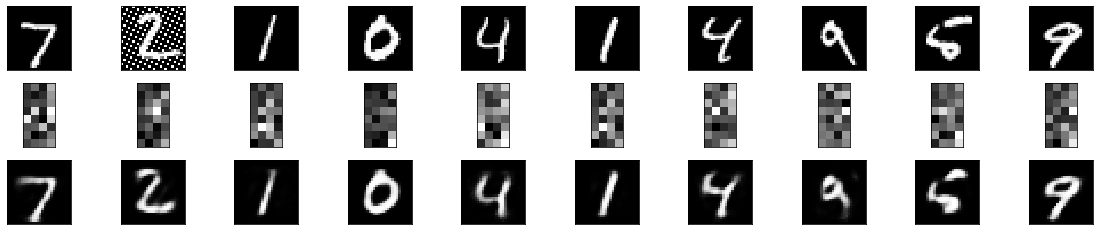

In [17]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i +1+ n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
import sys
print("encoded image in MB", sys.getsizeof(encoded_imgs)/1000000)
print("decoded image in MB", sys.getsizeof(decoded_imgs)/1000000)

encoded image in MB 1.280112
decoded image in MB 31.360112


In [14]:
# deep autoencoders
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.3602 - val_loss: 0.2634
Epoch 2/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2579 - val_loss: 0.2519
Epoch 3/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.2429 - val_loss: 0.2342
Epoch 4/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.2226 - val_loss: 0.2108
Epoch 5/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.2014 - val_loss: 0.1972
Epoch 6/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1911 - val_loss: 0.1899
Epoch 7/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1839 - val_loss: 0.1803
Epoch 8/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1783 - val_loss: 0.1734
Epoch 9/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1743 - val_loss: 0.1

In [15]:
# adding noise
for i in range(len(x_test[1])):
    if (i%5 == 0):
        x_test[1][i] = 1
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

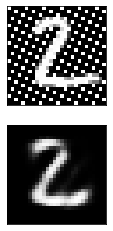

In [16]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 1  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()